In [2]:
#Similiar to advertising with degree of 2 instead of 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()
path

advertising = pd.read_csv("Advertising.csv")

In [3]:
X = advertising.drop('sales', axis=1)    #X is advertising without the sales column
y = advertising['sales']                 #Y is the sales column from advertising
X.shape

(200, 3)

(200, 3)
(200, 9)
(200, 19)
(200, 34)
(200, 55)
(200, 83)
(200, 119)
(200, 164)
(200, 219)


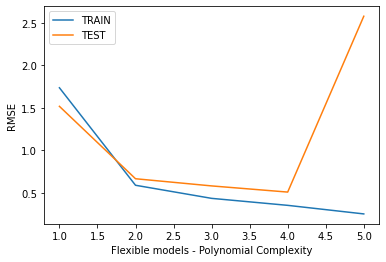

In [5]:
train_RMSE_errors=[]
test_RMSE_errors=[]

for k in range(1, 10):
    polynomial_converter = PolynomialFeatures(degree=k, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    print(poly_features.shape)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101) #test size can be changed
    estimator = LinearRegression(fit_intercept=True)
    estimator.fit(X_train,y_train)
    
    train_predictions = estimator.predict(X_train)
    test_predictions = estimator.predict(X_test)
    
    MSE = mean_squared_error(y_train,train_predictions)
    RMSE_train = np.sqrt(MSE)
    
    MSE = mean_squared_error(y_test,test_predictions)
    RMSE_test = np.sqrt(MSE)
    
    train_RMSE_errors.append(RMSE_train)
    test_RMSE_errors.append(RMSE_test)
    
plt.plot(range(1,6),train_RMSE_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_RMSE_errors[:5],label='TEST')
plt.xlabel('Flexible models - Polynomial Complexity')
plt.ylabel("RMSE")
plt.legend()